# Real Time implementaion

## Importing Dependencies

In [2]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from pygame import mixer
import pygame
import mediapipe as mp
import numpy as np
import time
import dlib
import math
from scipy.spatial import distance as dist
from imutils import face_utils
from mtcnn.mtcnn import MTCNN

pygame 2.6.0 (SDL 2.28.4, Python 3.12.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


## InceptionV3 model

### Images

In [3]:
# Load cascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

model = load_model("./models/inceptionV3_open_closed_eye.keras")

In [4]:
# Specify the image path
image_path = 'test_data_for_model_inferencing/eyes_open_img_1.jpg'
image_path1 = 'test_data_for_model_inferencing/eye_closed_img_1.jpg'
image_path2 = 'test_data_for_model_inferencing/mouth_open.jpg'
image_path3 = 'test_data_for_model_inferencing/mouth_open2.jpg'
image_path4 = 'test_data_for_model_inferencing/head_down_1.jpg'

In [42]:
def inceptionv_eye(image_path):
    frame = cv2.imread(image_path)
    
    if frame is None:
        print("Failed to load image.")
    else:
        detector = MTCNN()
        # Perform face detection
        results = detector.detect_faces(frame)
    
        if len(results) == 0:
            print("No faces detected.")
        else:
            for result in results:
                x, y, width, height = result['box']
                cv2.rectangle(frame, (x, y), (x + width, y + height), (255, 0, 0), 2)  # Draw rectangle around face
    
                # Crop the face region
                face_roi = frame[y:y + height, x:x + width]
    
                # Approximate eye region (upper half of the face)
                eye_region_y1 = int(0.25 * height)  # Start slightly below the forehead
                eye_region_y2 = int(0.5 * height)   # Middle of the face
                eye_region_x1 = int(0.15 * width)   # Slightly inside from the left edge
                eye_region_x2 = int(0.85 * width)   # Slightly inside from the right edge
    
                # Coordinates for drawing rectangles around the eye regions
                left_eye_box = (eye_region_x1, eye_region_y1, int(width / 2) - eye_region_x1, eye_region_y2 - eye_region_y1)
                right_eye_box = (int(width / 2), eye_region_y1, eye_region_x2 - int(width / 2), eye_region_y2 - eye_region_y1)
    
                # Draw rectangles around the approximate left and right eye regions
                cv2.rectangle(face_roi, (left_eye_box[0], left_eye_box[1]), 
                              (left_eye_box[0] + left_eye_box[2], left_eye_box[1] + left_eye_box[3]), 
                              (0, 255, 0), 2)  # Left eye box
    
                cv2.rectangle(face_roi, (right_eye_box[0], right_eye_box[1]), 
                              (right_eye_box[0] + right_eye_box[2], right_eye_box[1] + right_eye_box[3]), 
                              (0, 255, 0), 2)  # Right eye box
    
                # Crop the left and right eye regions
                left_eye_roi = face_roi[eye_region_y1:eye_region_y2, eye_region_x1:int(width / 2)]
                right_eye_roi = face_roi[eye_region_y1:eye_region_y2, int(width / 2):eye_region_x2]
    
                # Preprocess each eye region for the model
                for eye, box in zip([left_eye_roi, right_eye_roi], [left_eye_box, right_eye_box]):
                    eye_resized = cv2.resize(eye, (80, 80))
                    eye_normalized = eye_resized / 255.0
                    eye_reshaped = eye_normalized.reshape(80, 80, 3)
                    eye_input = np.expand_dims(eye_reshaped, axis=0)
    
                    # Model prediction
                    prediction = model.predict(eye_input)
    
                    # Determine eye status
                    if prediction[0][0] > 0.30:  # Eyes closed
                        result_text = 'closed'
                    elif prediction[0][1] > 0.90:  # Eyes open
                        result_text = 'open'
                    else:
                        result_text = 'unknown'
    
                    # Display result on the image (on top of the eye box)
                    cv2.putText(face_roi, f'{result_text}', (box[0], box[1] - 10), 
                                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=2, 
                                color=(0, 255, 0), thickness=3, lineType=cv2.LINE_AA)
    
            # Convert BGR image to RGB for displaying
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
            # Display the image in the notebook
            plt.figure(figsize=(10, 8))
            plt.imshow(frame)
            plt.axis('off')  # Turn off axis numbers and ticks
            plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


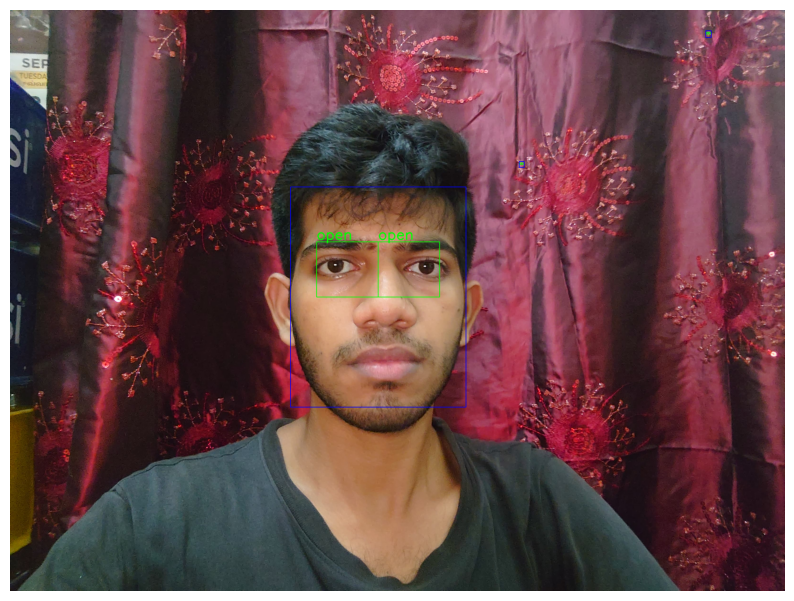

In [44]:
inceptionv_eye(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


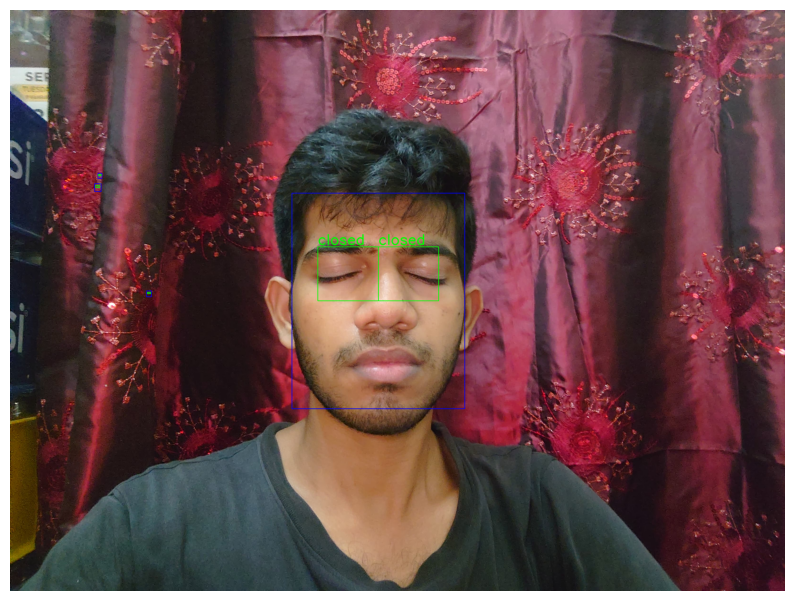

In [46]:
inceptionv_eye(image_path1)

Detects only whether eyes are closed or not if closed for more than a threshold value beep sound emits

### Webcam

In [16]:
# Initialize sound
mixer.init()
sound = mixer.Sound('./dataset/alert_tone/alarm.wav')

In [20]:
# Capture video from webcam
cap = cv2.VideoCapture(2)  # Change to 0 or 1 if your webcam is on a different ID

Score = 0

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break
    height, width = frame.shape[0:2]
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=3)

    # Draw a rectangle for the score display
    cv2.rectangle(frame, (0, height - 50), (200, height), (0, 0, 0), thickness=cv2.FILLED)
    
    for (x, y, w, h) in faces:
        # Draw rectangle around each detected face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        
        # Define the face region of interest (ROI)
        face_roi_gray = gray[y:y + h, x:x + w]
        face_roi_color = frame[y:y + h, x:x + w]

        # Detect eyes within the face ROI
        eyes = eye_cascade.detectMultiScale(face_roi_gray, scaleFactor=1.1, minNeighbors=1)

        for (ex, ey, ew, eh) in eyes:
            # Draw rectangle around each detected eye
            cv2.rectangle(face_roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

            # Preprocess the eye region for the model
            eye = face_roi_color[ey:ey + eh, ex:ex + ew]
            eye = cv2.resize(eye, (80, 80))
            eye = eye / 255.0
            eye = eye.reshape(80, 80, 3)
            eye = np.expand_dims(eye, axis=0)

            # Model prediction
            prediction = model.predict(eye)

            # If eyes are closed
            if prediction[0][0] > 0.30:
                cv2.putText(frame, 'closed', (10, height - 20), fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL, fontScale=1, color=(255, 255, 255),
                            thickness=1, lineType=cv2.LINE_AA)
                cv2.putText(frame, 'Score ' + str(Score), (100, height - 20), fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL, fontScale=1, color=(255, 255, 255),
                            thickness=1, lineType=cv2.LINE_AA)
                Score += 1
                if Score > 15:
                    try:
                        sound.play()
                    except:
                        pass

            # If eyes are open
            elif prediction[0][1] > 0.90:
                cv2.putText(frame, 'open', (10, height - 20), fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL, fontScale=1, color=(255, 255, 255),
                            thickness=1, lineType=cv2.LINE_AA)
                cv2.putText(frame, 'Score ' + str(Score), (100, height - 20), fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL, fontScale=1, color=(255, 255, 255),
                            thickness=1, lineType=cv2.LINE_AA)
                Score -= 1
                if Score < 0:
                    Score = 0

    # Display the frame
    cv2.imshow('Drowsiness Detection', frame)

    # Break loop on 'q' key press
    if cv2.waitKey(33) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

## Dlib eye and mouth open or closed detection

### Images

In [8]:
# Yawn calculation function (lip distance)
def calculate_lip_distance(shape):
    upper_lip = shape[51]  # Landmark for the upper lip
    lower_lip = shape[57]  # Landmark for the lower lip
    lip_distance = dist.euclidean(upper_lip, lower_lip)
    return lip_distance

In [10]:
# Function to calculate EAR
def calculate_ear(eye):
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    C = dist.euclidean(eye[0], eye[3])
    ear = (A + B) / (2.0 * C)
    return ear

# Load the detector and predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('./models/shape_predictor_68_face_landmarks.dat')

# Indices for the eyes in the landmark array
(left_eye_start, left_eye_end) = (36, 41)
(right_eye_start, right_eye_end) = (42, 47)

In [12]:
# Initialize variables
Score = 0  # Track drowsiness score
ALERT_THRESHOLD = 30  # Trigger sound alert if score exceeds this
DROWSINESS_THRESHOLD = 0.21  # EAR threshold to detect drowsiness
YAWN_THRESHOLD = 100

In [18]:
# Load the image
def dlib_mouth_eyes(image_path):
    frame = cv2.imread(image_path)
    
    if frame is None:
        print("Failed to load image.")
    else:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        rects = detector(gray, 0)
    
        for rect in rects:
            shape = predictor(gray, rect)
            shape = face_utils.shape_to_np(shape)
    
            left_eye = shape[left_eye_start:left_eye_end + 1]
            right_eye = shape[right_eye_start:right_eye_end + 1]
    
            left_ear = calculate_ear(left_eye)
            right_ear = calculate_ear(right_eye)
    
            ear = (left_ear + right_ear) / 2.0
    
            # Draw landmarks for the left eye
            for (x, y) in left_eye:
                cv2.circle(frame, (x, y), 2, (0, 255, 0), -1)  # Green circles on left eye landmarks
    
            # Draw landmarks for the right eye
            for (x, y) in right_eye:
                cv2.circle(frame, (x, y), 2, (0, 255, 0), -1)  # Green circles on right eye landmarks
    
            # Connect the points with lines for visualization
            for i in range(len(left_eye) - 1):
                cv2.line(frame, tuple(left_eye[i]), tuple(left_eye[i + 1]), (0, 255, 255), 7)  # Yellow lines for left eye
            cv2.line(frame, tuple(left_eye[0]), tuple(left_eye[-1]), (0, 255, 255), 7)  # Close the left eye shape
    
            for i in range(len(right_eye) - 1):
                cv2.line(frame, tuple(right_eye[i]), tuple(right_eye[i + 1]), (0, 255, 255), 7)  # Yellow lines for right eye
            cv2.line(frame, tuple(right_eye[0]), tuple(right_eye[-1]), (0, 255, 255), 7)  # Close the right eye shape
    
            # Detect if the eyes are closed or open based on EAR
            if ear < DROWSINESS_THRESHOLD:
                cv2.putText(frame, "Eyes Closed", (10, 200), cv2.FONT_HERSHEY_SIMPLEX, 8, (0, 0, 255), 10)
            else:
                cv2.putText(frame, "Eyes Open", (10, 200), cv2.FONT_HERSHEY_SIMPLEX, 8, (0, 255, 0), 10)
    
            # Calculate lip distance to detect yawning
            lip_distance = calculate_lip_distance(shape)
            print(lip_distance)
            if lip_distance > 140:
                cv2.putText(frame, "Yawn Detected", (10, 400), cv2.FONT_HERSHEY_SIMPLEX, 8, (0, 0, 255), 10)
            else:
                cv2.putText(frame, "Mouth Closed", (10, 400), cv2.FONT_HERSHEY_SIMPLEX, 8, (0, 255, 0), 10)
    
        # Convert BGR image to RGB for displaying
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
        # Display the image in the notebook
        plt.figure(figsize=(10, 8))
        plt.imshow(frame_rgb)
        plt.axis('off')  # Turn off axis numbers and ticks
        plt.show()

128.06248474865697


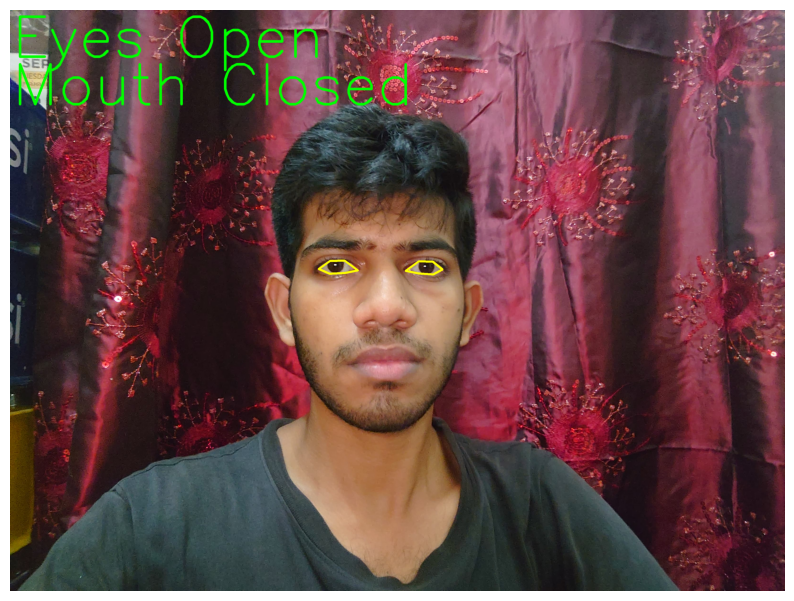

In [20]:
dlib_mouth_eyes(image_path)

129.0155029444136


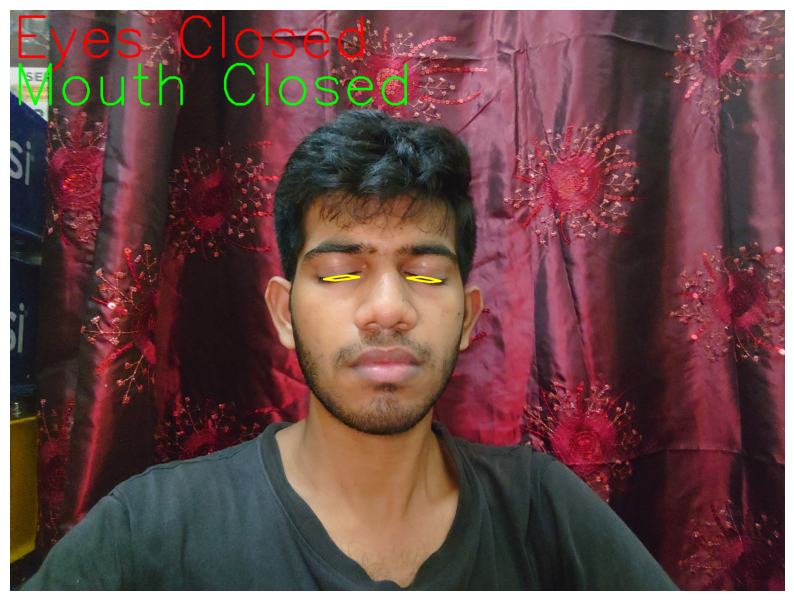

In [21]:
dlib_mouth_eyes(image_path1)

172.18594600024707


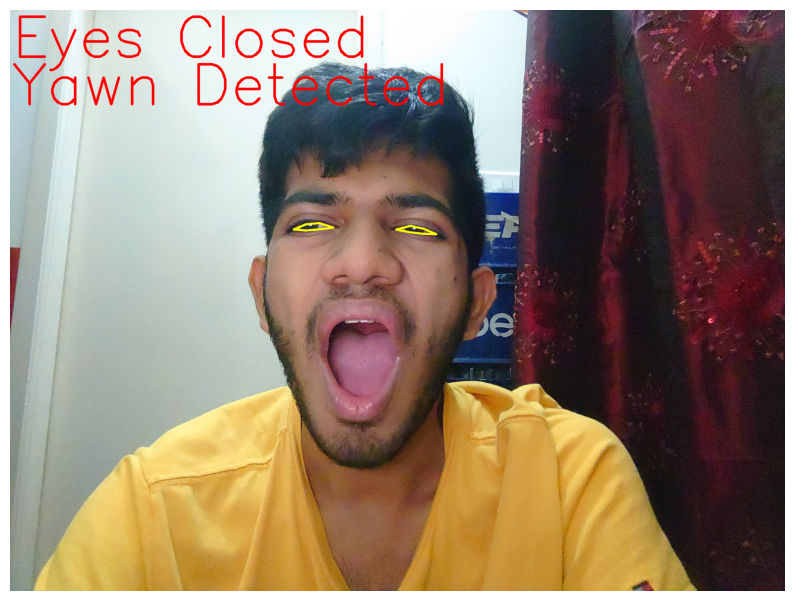

In [22]:
dlib_mouth_eyes(image_path2)

144.00347218036097


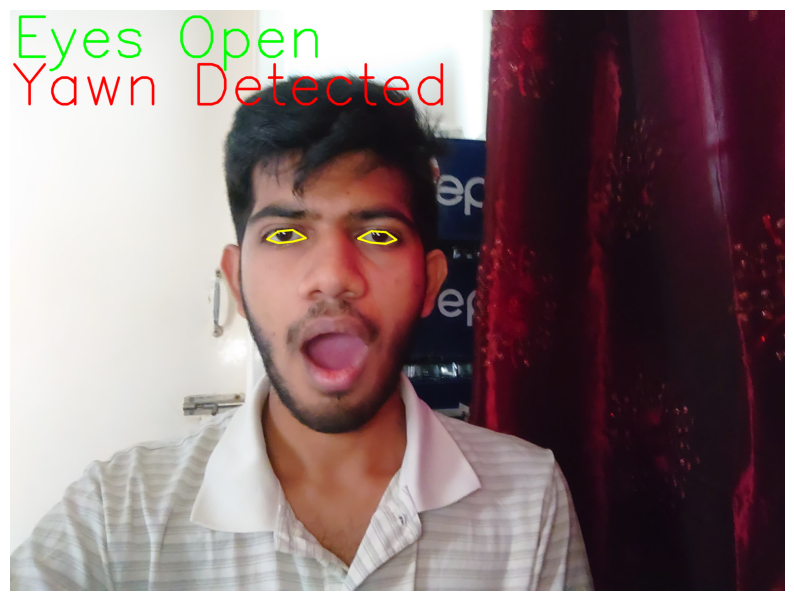

In [26]:
dlib_mouth_eyes(image_path3)

### Webcam 

In [32]:
# Capture video from webcam
cap = cv2.VideoCapture(1)
while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 0)

    for rect in rects:
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # Eye detection
        left_eye = shape[left_eye_start:left_eye_end + 1]
        right_eye = shape[right_eye_start:right_eye_end + 1]
        left_ear = calculate_ear(left_eye)
        right_ear = calculate_ear(right_eye)
        ear = (left_ear + right_ear) / 2.0

        # Mouth detection
        lip_distance = calculate_lip_distance(shape)

        # Draw eye landmarks
        for (x, y) in np.concatenate((left_eye, right_eye)):
            cv2.circle(frame, (x, y), 2, (0, 255, 0), -1)
        for i in range(len(left_eye) - 1):
            cv2.line(frame, tuple(left_eye[i]), tuple(left_eye[i + 1]), (0, 255, 255), 1)
        cv2.line(frame, tuple(left_eye[0]), tuple(left_eye[-1]), (0, 255, 255), 1)
        for i in range(len(right_eye) - 1):
            cv2.line(frame, tuple(right_eye[i]), tuple(right_eye[i + 1]), (0, 255, 255), 1)
        cv2.line(frame, tuple(right_eye[0]), tuple(right_eye[-1]), (0, 255, 255), 1)

        # Detect drowsiness based on EAR
        if ear < DROWSINESS_THRESHOLD:
            cv2.putText(frame, "DROWSY", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            Score += 1
        else:
            Score -= 1
            if Score < 0:
                Score = 0

        # Detect yawning based on lip distance
        if lip_distance > 26:
            cv2.putText(frame, "Yawning", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            Score += 1

        # Play alert if score crosses threshold
        if Score > ALERT_THRESHOLD:
            cv2.putText(frame, "ALERT!!!", (10, 90), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            try:
                sound.play()
            except Exception as e:
                print(f"Error playing sound: {e}")
            Score = 0  # Reset score after alert

    # Display the frame with annotations
    cv2.imshow("Drowsiness and Yawn Detection", frame)

    # Exit on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## Media pipe for pose estimation

### Image

In [233]:
def calculate_distance(point1, point2):
    return math.sqrt((point1.x - point2.x) ** 2 + (point1.y - point2.y) ** 2)

In [227]:
def mediapipe_pose_estimation(image_path):
    # Initialize MediaPipe Pose
    mp_pose = mp.solutions.pose
    mp_drawing = mp.solutions.drawing_utils
    
    # Define the threshold distance for head down position
    HEAD_DOWN_THRESHOLD = 0.2  # Adjust based on testing
    
    # Read and convert the image to RGB
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Process the image with MediaPipe Pose
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        results = pose.process(image_rgb)
    
    # Draw landmarks on the image if they exist
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        
        # Get the nose and shoulder landmarks
        nose = results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE]
        left_shoulder = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER]
        right_shoulder = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER]
        
        # Calculate the collar (midpoint between shoulders)
        collar_x = (left_shoulder.x + right_shoulder.x) / 2
        collar_y = (left_shoulder.y + right_shoulder.y) / 2
        collar_point = type('Landmark', (object,), {'x': collar_x, 'y': collar_y})
        
        # Calculate the distance between nose and collar
        distance_nose_collar = calculate_distance(nose, collar_point)
        
        # Check if head is tilted downward based on distance
        if distance_nose_collar < HEAD_DOWN_THRESHOLD:
            cv2.putText(image, "Head Down!", (30, 200), cv2.FONT_HERSHEY_SIMPLEX, 8, (0, 0, 255), 8)
        else:
            cv2.putText(image, "Head Straight!", (30, 200), cv2.FONT_HERSHEY_SIMPLEX, 8, (0, 255, 0), 8)
    
    # Display the nose to collar distance for debugging
    print("Nose to Collar Distance:", distance_nose_collar)
    
    # Display the image with the result using matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axis
    plt.title("Head Position Detection")
    plt.show()

Nose to Collar Distance: 0.10619641251837866


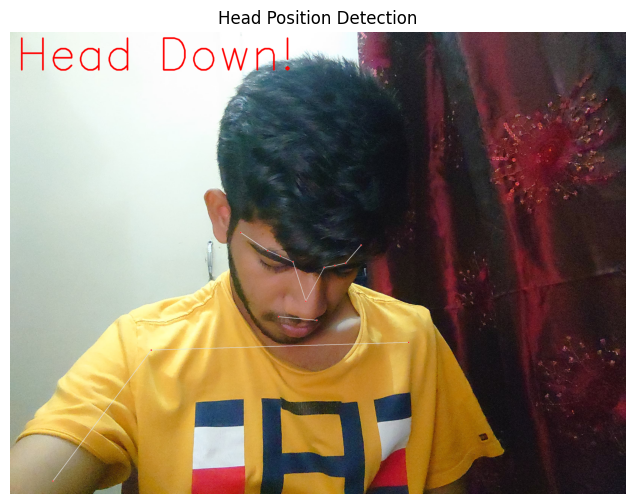

In [229]:
mediapipe_pose_estimation(image_path4)

Nose to Collar Distance: 0.37169897306571537


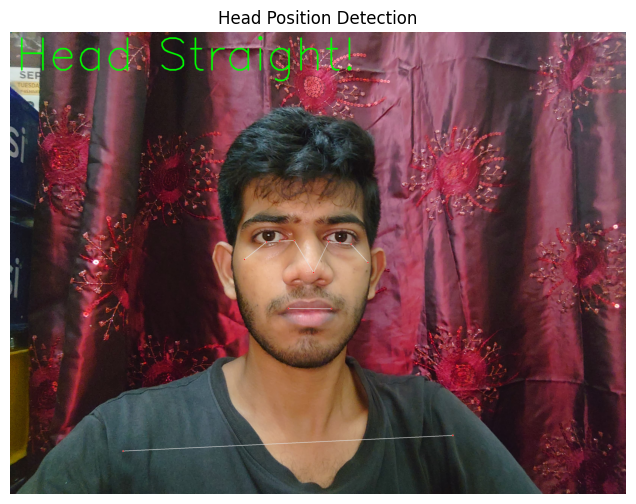

In [230]:
mediapipe_pose_estimation(image_path)

### Webcam

In [257]:
# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Define head down threshold
HEAD_DOWN_THRESHOLD = 0.2  # Adjust based on testing

In [259]:
# Define the calculate_distance function
def calculate_distance(point1, point2):
    return math.sqrt((point1.x - point2.x) ** 2 + (point1.y - point2.y) ** 2)

In [261]:
# Start video capture
cap = cv2.VideoCapture(2)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(frame_rgb)
    frame = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2BGR)

    # Check for head pose using MediaPipe Pose
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        
        # Get the nose and shoulder landmarks
        nose = results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE]
        left_shoulder = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER]
        right_shoulder = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER]
        
        # Calculate the collar (midpoint between shoulders)
        collar_x = (left_shoulder.x + right_shoulder.x) / 2
        collar_y = (left_shoulder.y + right_shoulder.y) / 2
        collar_point = type('Landmark', (object,), {'x': collar_x, 'y': collar_y})
        
        # Calculate the distance between nose and collar
        distance_nose_collar = calculate_distance(nose, collar_point)
        
        # Check if head is tilted downward based on distance
        if distance_nose_collar < HEAD_DOWN_THRESHOLD:
            cv2.putText(frame, "Head Down!", (30, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        else:
            cv2.putText(frame, "Head Straight!", (30, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow("Head Position Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()
pose.close()

## Combined

### Webcam no sound

In [270]:
# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

In [207]:
# Thresholds for drowsiness and yawning
EAR_THRESHOLD = 0.21
LIP_THRESHOLD = 26
HEAD_DOWN_ANGLE = 0.58  # Tilt angle threshold for head down

In [217]:
# Start video capture
cap = cv2.VideoCapture(2)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(frame_rgb)
    frame = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2BGR)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 0)

    # Check for head pose using MediaPipe Pose
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        nose = results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE]

        # Head pose estimation (simple heuristic based on nose position)
        nose_x = int(nose.x * frame.shape[1])
        nose_y = int(nose.y * frame.shape[0])
        cv2.circle(frame, (nose_x, nose_y), 5, (255, 0, 0), -1)

        # Check if head is tilted downward (assuming nose should be high in the frame if upright)
        if nose.y > 0.58:  # Change the threshold based on camera position
            cv2.putText(frame, "Head Down!", (30, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Dlib detection for eye and yawn
    for rect in rects:
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # Detect eye closure
        left_eye = shape[left_eye_start:left_eye_end + 1]
        right_eye = shape[right_eye_start:right_eye_end + 1]

        left_ear = calculate_ear(left_eye)
        right_ear = calculate_ear(right_eye)
        ear = (left_ear + right_ear) / 2.0

        # Draw eyes
        for (x, y) in left_eye:
            cv2.circle(frame, (x, y), 2, (0, 255, 0), -1)
        for (x, y) in right_eye:
            cv2.circle(frame, (x, y), 2, (0, 255, 0), -1)

        # Display Drowsy alert if EAR below threshold
        if ear < EAR_THRESHOLD:
            cv2.putText(frame, "Drowsy!", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        # Detect yawning
        lip_distance = calculate_lip_distance(shape)
        if lip_distance > LIP_THRESHOLD:
            cv2.putText(frame, "Yawning!", (10, 80), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    cv2.imshow("Drowsiness & Yawning Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

### Webcam with sound

In [128]:
music1 = pygame.mixer.Sound('./dataset/alert_tone/alarm2.wav')
music2 = pygame.mixer.Sound('./dataset/alert_tone/alarm.wav')
# Create channels
channel1 = pygame.mixer.Channel(0)  # For yawning sound
channel2 = pygame.mixer.Channel(1)  # For drowsiness and head down sound

In [171]:
# Thresholds for drowsiness, yawning, and head position
EAR_THRESHOLD = 0.20
LIP_THRESHOLD = 28
HEAD_DOWN_ANGLE = 0.58  # Use a normalized value based on nose.y
SLEEP_TIME = 5  # Time to detect continuous eye closure (in seconds)

In [272]:
# Start video capture
cap = cv2.VideoCapture(2)

# Initialize variables for time tracking and sound playing
closed_start_time = None
head_down_start_time = None
alarm_playing = False

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(frame_rgb)
    frame = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2BGR)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 0)

    # Check for head pose using MediaPipe Pose
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        
        # Get the nose and shoulder landmarks
        nose = results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE]
        left_shoulder = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER]
        right_shoulder = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER]
        
        # Calculate the collar (midpoint between shoulders)
        collar_x = (left_shoulder.x + right_shoulder.x) / 2
        collar_y = (left_shoulder.y + right_shoulder.y) / 2
        collar_point = type('Landmark', (object,), {'x': collar_x, 'y': collar_y})
        
        # Calculate the distance between nose and collar
        distance_nose_collar = calculate_distance(nose, collar_point)
        
        # Check if head is tilted downward based on distance
        if distance_nose_collar < HEAD_DOWN_THRESHOLD:
            cv2.putText(frame, "Head Down!", (30, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            if not channel1.get_busy():  # Check if music1 is not already playing
                channel1.play(music1)  # Play music1
        else:
            cv2.putText(frame, "Head Straight!", (30, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    # Dlib detection for eye and yawn
    for rect in rects:
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # Detect eye closure
        left_eye = shape[left_eye_start:left_eye_end + 1]
        right_eye = shape[right_eye_start:right_eye_end + 1]

        left_ear = calculate_ear(left_eye)
        right_ear = calculate_ear(right_eye)
        ear = (left_ear + right_ear) / 2.0

        # Draw eyes
        for (x, y) in left_eye:
            cv2.circle(frame, (x, y), 2, (0, 255, 0), -1)
        for (x, y) in right_eye:
            cv2.circle(frame, (x, y), 2, (0, 255, 0), -1)

        # Display Drowsy alert if EAR below threshold
        if ear < EAR_THRESHOLD:
            cv2.putText(frame, "Eye Closed!", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            if closed_start_time is None:
                closed_start_time = time.time()  # Start timer
            else:
                elapsed_time = time.time() - closed_start_time
                if elapsed_time >= SLEEP_TIME:
                    cv2.putText(frame, "Drowsy!", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
                    if not channel2.get_busy():
                        channel2.play(music2, loops=-1)  # Play music2 continuously
                        alarm_playing = True
        else:
            closed_start_time = None
            if alarm_playing:
                channel2.stop()  # Stop music2
                alarm_playing = False

        # Detect yawning
        lip_distance = calculate_lip_distance(shape)
        if lip_distance > LIP_THRESHOLD:
            cv2.putText(frame, "Yawning!", (10, 80), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            if not channel1.get_busy():  # Check if music1 is not already playing
                channel1.play(music1)  # Play music1

    cv2.imshow("Drowsiness & Yawning Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()